In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Warm-up phase

In [2]:
def get_sim_secs(dir):
    with open("roba_out/"+ dir + "/stats.txt") as f:
        lines = f.readlines() 
        sim_sec_line = lines[2]
        sim_secs = float(sim_sec_line.split("simSeconds")[1].split("#")[0].strip())
        return sim_secs

In [3]:
def get_mem_lat(dir):
    with open("roba_out/"+ dir + "/stats.txt") as f:
        lines = f.readlines() 
        for line in lines:
            if line.startswith("system.mem_ctrl.dram.avgMemAccLat"):
                return float(line.split("system.mem_ctrl.dram.avgMemAccLat")[1].split("#")[0])

In [4]:
sim_secs_dict = dict()

for file in os.listdir("roba_out"):
    if file.split("_")[0] == "baseline":
        secs = get_sim_secs(file)
        if sim_secs_dict.get("baseline", None) == None:
            sim_secs_dict["baseline"] = []
        sim_secs_dict["baseline"].append(secs)
    if file.split("_")[:2] == ["ddr3", "2133"]:
        secs = get_sim_secs(file)
        if sim_secs_dict.get("ddr3_2133", None) == None:
            sim_secs_dict["ddr3_2133"] = []
        sim_secs_dict["ddr3_2133"].append(secs)
    if file.split("_")[0] == "16assoc":
        secs = get_sim_secs(file)
        if sim_secs_dict.get("16assoc", None) == None:
            sim_secs_dict["16assoc"] = []
        sim_secs_dict["16assoc"].append(secs)
    if file.split("_")[0] == "400MHz":
        secs = get_sim_secs(file)
        if sim_secs_dict.get("400mhz", None) == None:
            sim_secs_dict["400mhz"] = []
        sim_secs_dict["400mhz"].append(secs)
    if file.split("_")[0] == "4GHz":
        secs = get_sim_secs(file)
        if sim_secs_dict.get("4ghz", None) == None:
            sim_secs_dict["4ghz"] = []
        sim_secs_dict["4ghz"].append(secs)
    if file.split("_")[0] == "lpddr2":
        secs = get_sim_secs(file)
        if sim_secs_dict.get("lpddr2", None) == None:
            sim_secs_dict["lpddr2"] = []
        sim_secs_dict["lpddr2"].append(secs)

In [5]:
sim_secs_dict

{'baseline': [2.714573, 2.714573, 2.714573, 2.714573, 2.714573],
 '16assoc': [2.714708, 2.714708, 2.714708, 2.714708, 2.714708],
 'ddr3_2133': [2.689971, 2.689971, 2.689971, 2.689971, 2.689971],
 'lpddr2': [2.870145, 2.870145, 2.870145, 2.870145, 2.870145],
 '400mhz': [6.199747, 6.199747, 6.199747, 6.199747, 6.199747],
 '4ghz': [1.0037, 1.0037, 1.0037, 1.0037, 1.0037]}

In [6]:
mem_lat_dict = dict()

for file in os.listdir("roba_out"):
    if file.split("_")[0] == "baseline":
        lat = get_mem_lat(file)
        if mem_lat_dict.get("baseline", None) == None:
            mem_lat_dict["baseline"] = []
        mem_lat_dict["baseline"].append(lat)
    if file.split("_")[:2] == ["ddr3", "2133"]:
        lat = get_mem_lat(file)
        if mem_lat_dict.get("ddr3_2133", None) == None:
            mem_lat_dict["ddr3_2133"] = []
        mem_lat_dict["ddr3_2133"].append(lat)
    if file.split("_")[0] == "lpddr2":
        lat = get_mem_lat(file)
        if mem_lat_dict.get("lpddr2", None) == None:
            mem_lat_dict["lpddr2"] = []
        mem_lat_dict["lpddr2"].append(lat)

In [7]:
mem_lat_dict

{'baseline': [29393.12, 29393.12, 29393.12, 29393.12, 29393.12],
 'ddr3_2133': [26573.39, 26573.39, 26573.39, 26573.39, 26573.39],
 'lpddr2': [44127.01, 44127.01, 44127.01, 44127.01, 44127.01]}

[2.714573, 2.714708]
[0.0, 0.0]


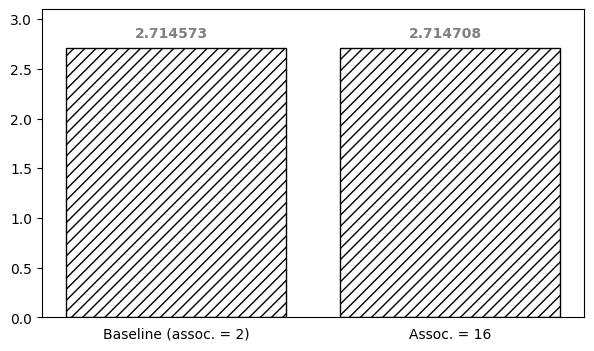

In [8]:
# assoc makes no difference
# as the LRU is used for everything there is no stderr (always the same evicted - least recently used)
keys = ["baseline", "16assoc"]
labels = ["Baseline (assoc. = 2)", "Assoc. = 16"]
values = [np.mean(sim_secs_dict[key]) for key in keys]
std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
print(values)
print(std_errs)

fig, ax = plt.subplots(figsize =(7, 4))
ax.xaxis.set_ticks_position('none')
ax.bar(labels, values, fill=None, hatch="///")
ax.set_ylim(0,3.1)

for i in ax.patches:
    plt.text(i.get_x()+0.25, i.get_height()+0.1,
             str((i.get_height())),
             fontsize = 10, fontweight ='bold',
             color ='grey')

[2.714573, 2.689971, 2.870145]
[0.0, 0.0, 0.0]


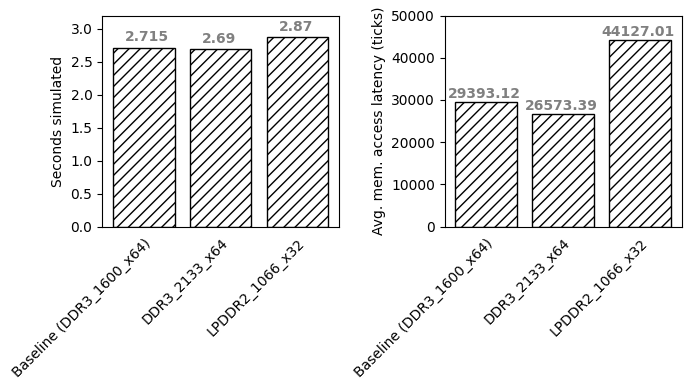

In [9]:
# low power is obviously much slower, the higher frequency of the second helps a little
keys = ["baseline", "ddr3_2133", "lpddr2"]
labels = ["Baseline (DDR3_1600_x64)", "DDR3_2133_x64", "LPDDR2_1066_x32"]
values = [np.mean(sim_secs_dict[key]) for key in keys]
values_lat = [np.mean(mem_lat_dict[key]) for key in keys]
std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
print(values)
print(std_errs)

fig, ax = plt.subplots(1,2,figsize =(7, 4))

ax[0].xaxis.set_ticks_position('none')
ax[0].bar(labels, values, fill=None, hatch="///")
ax[0].set_ylim(0,3.2)
ax[0].set_ylabel("Seconds simulated")

for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")

for i in ax[0].patches:
    ax[0].text(i.get_x()+0.15, i.get_height()+0.1,
             str(round(i.get_height(),3)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax[1].xaxis.set_ticks_position('none')
ax[1].bar(labels, values_lat, fill=None, hatch="///")
ax[1].set_ylim(0,50000)
ax[1].set_ylabel("Avg. mem. access latency (ticks)")

for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")

for i in ax[1].patches:
    ax[1].text(i.get_x()-0.1, i.get_height()+1000,
             str(round(i.get_height(),2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
fig.tight_layout()

[29393.120000000003, 26573.390000000003, 44127.01]
[3.637978807091713e-12, 3.637978807091713e-12, 0.0]


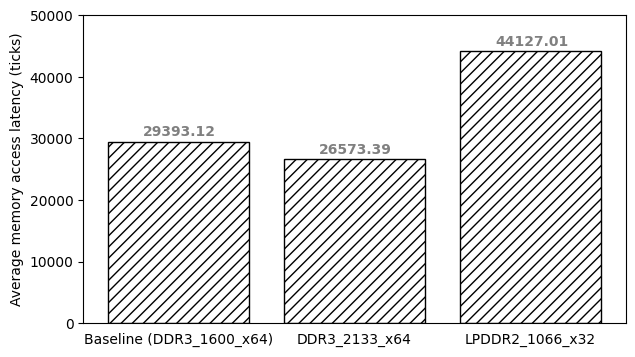

In [10]:
# low power is obviously much slower, the higher frequency of the second helps a little
keys = ["baseline", "ddr3_2133", "lpddr2"]
labels = ["Baseline (DDR3_1600_x64)", "DDR3_2133_x64", "LPDDR2_1066_x32"]
values = [np.mean(mem_lat_dict[key]) for key in keys]
std_errs =  [np.std(mem_lat_dict[key]) for key in keys]
print(values)
print(std_errs)

fig, ax = plt.subplots(figsize =(7, 4))
ax.xaxis.set_ticks_position('none')
ax.bar(labels, values, fill=None, hatch="///")
ax.set_ylim(0,50000)
ax.set_ylabel("Average memory access latency (ticks)")

for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+1000,
             str(round(i.get_height(), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

[2.714573, 6.199747, 1.0037]
[0.0, 0.0, 0.0]


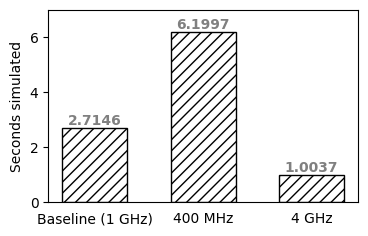

In [11]:
# frequency effect as expected
keys = ["baseline", "400mhz", "4ghz"]
labels = ["Baseline (1 GHz)", "400 MHz", "4 GHz"]
values = [np.mean(sim_secs_dict[key]) for key in keys]
std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
print(values)
print(std_errs)

fig, ax = plt.subplots(figsize =(4, 2.5))
ax.xaxis.set_ticks_position('none')
ax.bar(labels, values, 0.6, fill=None, hatch="///")
ax.set_ylim(0,7)
ax.set_ylabel("Seconds simulated")

for i in ax.patches:
    plt.text(i.get_x()+0.05, i.get_height()+0.1,
             str(round(i.get_height(), 4)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

In [12]:
sim_secs_two_level = sim_secs_dict

# Change replacement policy

In [13]:
sim_secs_dict = dict()

for file in os.listdir("roba_out"):
    if file.split("-")[0] == "three":
        if file.split("-")[2].split("_")[0] == "baseline":
            secs = get_sim_secs(file)
            if sim_secs_dict.get("baseline", None) == None:
                sim_secs_dict["baseline"] = []
            sim_secs_dict["baseline"].append(secs)
        if file.split("-")[2].split("_")[0] == "pseudo":
            secs = get_sim_secs(file)
            if sim_secs_dict.get("pseudo", None) == None:
                sim_secs_dict["pseudo"] = []
            sim_secs_dict["pseudo"].append(secs)
        if file.split("-")[2].split("_")[0] == "random":
            secs = get_sim_secs(file)
            if sim_secs_dict.get("random", None) == None:
                sim_secs_dict["random"] = []
            sim_secs_dict["random"].append(secs)


In [14]:
sim_secs_dict

{'baseline': [2.411779, 2.411779, 2.411779, 2.411779, 2.411779],
 'random': [2.416545, 2.41653, 2.416526, 2.416535, 2.416557],
 'pseudo': [2.410013, 2.40997, 2.410005, 2.410015, 2.410003]}

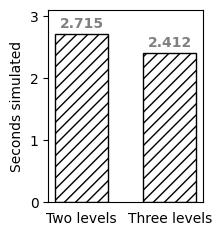

In [15]:
# not big of a difference. The algorithm does not have great spatial and temporal locality
labels = ["Two levels", "Three levels"]
values = [np.mean(sim_secs_two_level["baseline"]), np.mean(sim_secs_dict["baseline"])]
#std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
#print(values)
#print(std_errs)

fig, ax = plt.subplots(figsize =(2, 2.5))
ax.xaxis.set_ticks_position('none')
ax.bar(labels, values, 0.6, fill=None, hatch="///")
ax.set_ylim(0,3.1)
ax.set_ylabel("Seconds simulated")

for i in ax.patches:
    plt.text(i.get_x()+0.05, i.get_height()+0.1,
             str(round(i.get_height(),3)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

[2.411779, 2.4100012, 2.4165386]
[0.0, 1.6252999723178992e-05, 1.1182128598814419e-05]


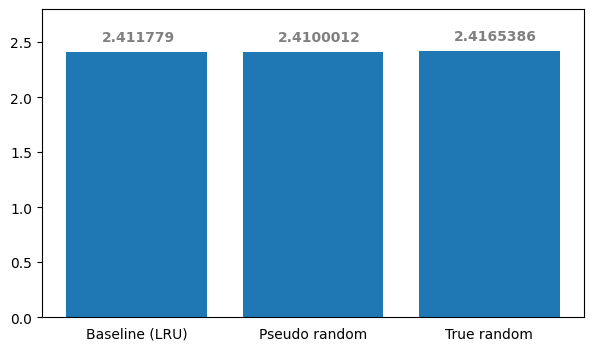

In [16]:
# not big of a difference. The algorithm does not have great spatial and temporal locality
keys = ["baseline", "pseudo", "random"]
labels = ["Baseline (LRU)", "Pseudo random", "True random"]
values = [np.mean(sim_secs_dict[key]) for key in keys]
std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
print(values)
print(std_errs)

fig, ax = plt.subplots(figsize =(7, 4))
ax.xaxis.set_ticks_position('none')
ax.bar(labels, values)
ax.set_ylim(0,2.8)

for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+0.1,
             str((i.get_height())),
             fontsize = 10, fontweight ='bold',
             color ='grey')

[2.411779, 2.4100012, 2.4165386]
[0.0, 1.6252999723178992e-05, 1.1182128598814419e-05]


"\nfor i in ax.patches:\n    plt.text(i.get_x()+0.2, i.get_height()+0.1,\n             str((i.get_height())),\n             fontsize = 10, fontweight ='bold',\n             color ='grey')\n"

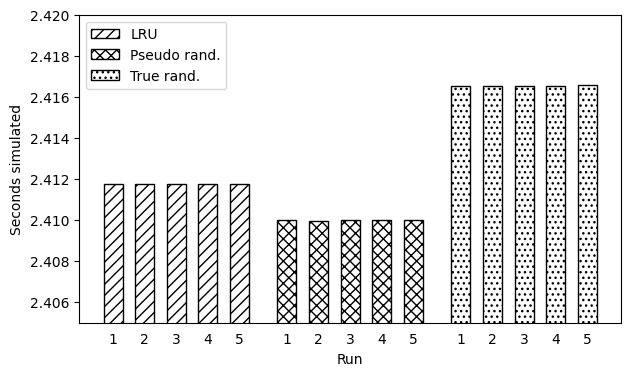

In [18]:
# not big of a difference. The algorithm does not have great spatial and temporal locality
keys = ["baseline", "pseudo", "random"]
labels_base = ["LRU", "Pseudo rand.", "True rand."]
values = [np.mean(sim_secs_dict[key]) for key in keys]
std_errs =  [np.std(sim_secs_dict[key]) for key in keys]
print(values)
print(std_errs)

hatches = ["///", "xxx", "..."]

fig, ax = plt.subplots(figsize =(7, 4))
ax.xaxis.set_ticks_position('none')
ax.set_ylabel("Seconds simulated")

width = 0.6

for i, key in enumerate(keys):
    x = np.arange(1,6)
    values = sim_secs_dict[key]
    #labels = [label + " " + str(j+1) for j,label in enumerate([labels_base[i]] * 5)]
    ax.bar(x + i*5.5, values, width, hatch=hatches[i], label=labels_base[i], fill=None)
ax.set_ylim(2.405,2.420)

ax.set_xticks(np.concatenate((np.arange(1,6), np.arange(1,6) + 5.5, np.arange(1,6) + 11)), [1,2,3,4,5]*3)

"""
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_rotation_mode("anchor")
    tick.set_ha("right")
"""
    
ax.legend()
ax.set_xlabel("Run")
"""
for i in ax.patches:
    plt.text(i.get_x()+0.2, i.get_height()+0.1,
             str((i.get_height())),
             fontsize = 10, fontweight ='bold',
             color ='grey')
"""

In [18]:
[label + " " + str(i) for i,label in enumerate([labels[0]] * 5)]

['Baseline (LRU) 0',
 'Baseline (LRU) 1',
 'Baseline (LRU) 2',
 'Baseline (LRU) 3',
 'Baseline (LRU) 4']

In [113]:
np.concatenate((np.arange(1,6), np.arange(1,6) + 5.5, np.arange(1,6) + 11))

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6.5,  7.5,  8.5,  9.5, 10.5, 12. ,
       13. , 14. , 15. , 16. ])